In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\notebooks")

In [2]:
sns.set(style="whitegrid")
df = pd.read_csv("../eda_outputs/tables/parsed_annotations.csv")

In [3]:
IMG_WIDTH = 1280
IMG_HEIGHT = 720

df["width_norm"] = (df["x2"] - df["x1"]) / IMG_WIDTH
df["height_norm"] = (df["y2"] - df["y1"]) / IMG_HEIGHT
df["aspect_ratio"] = df["width_norm"] / (df["height_norm"] + 1e-6)

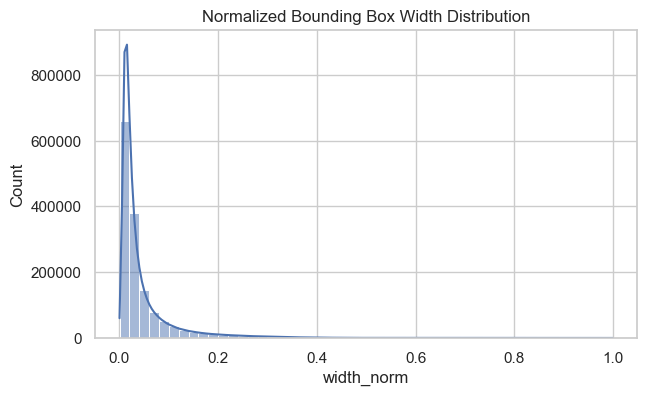

In [4]:
plt.figure(figsize=(7,4))
sns.histplot(df["width_norm"], kde=True, bins=50)
plt.title("Normalized Bounding Box Width Distribution")
plt.xlabel("width_norm")
plt.show()


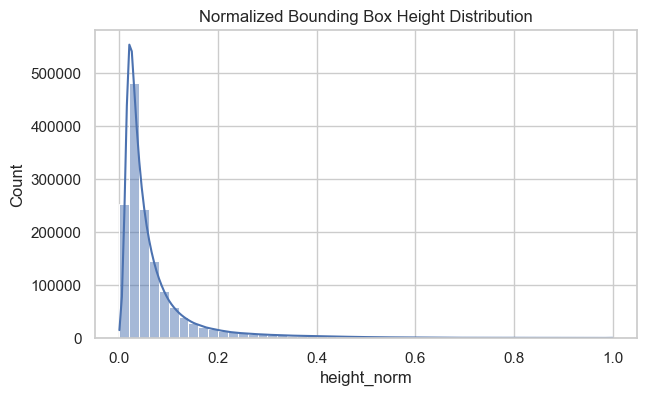

In [5]:
plt.figure(figsize=(7,4))
sns.histplot(df["height_norm"], kde=True, bins=50)
plt.title("Normalized Bounding Box Height Distribution")
plt.xlabel("height_norm")
plt.show()

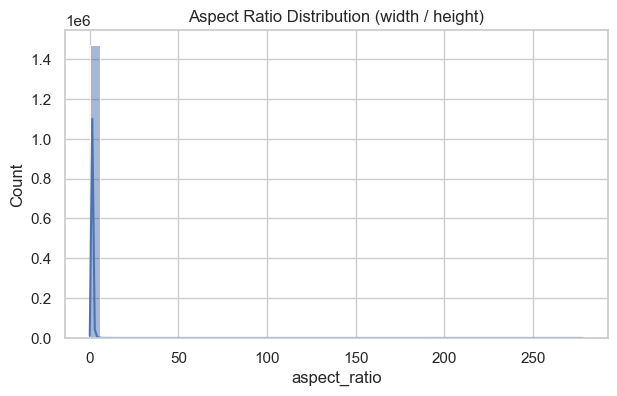

In [6]:
plt.figure(figsize=(7,4))
sns.histplot(df["aspect_ratio"], kde=True, bins=50)
plt.title("Aspect Ratio Distribution (width / height)")
plt.xlabel("aspect_ratio")
plt.show()

In [ ]:
sample_df = df.sample(n=50000, random_state=42)
plt.figure(figsize=(6,6))
sns.kdeplot(
    x=sample_df["width_norm"],
    y=sample_df ["height_norm"],
    fill=True,
    levels=30,
    cmap="viridis"
)
plt.title("2D Density of Normalized Object Width vs Height (Subsampled)")
plt.xlabel("width_norm")
plt.ylabel("height_norm")
plt.show()


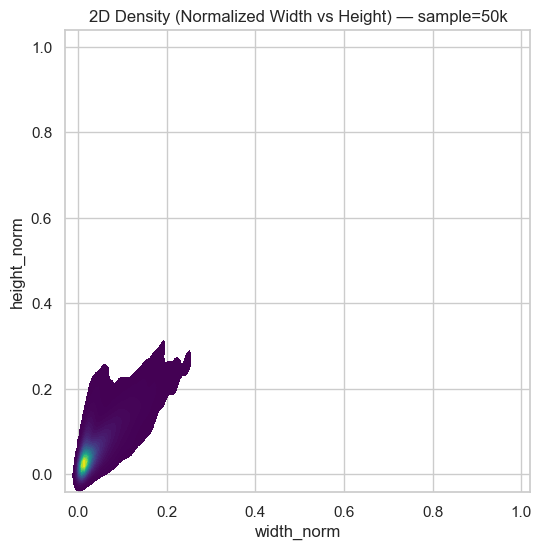

In [8]:
import numpy as np

# sample without bias while preserving distribution
df_sample = df.sample(n=50000, random_state=42)

plt.figure(figsize=(6,6))
sns.kdeplot(
    x=df_sample["width_norm"],
    y=df_sample["height_norm"],
    fill=True,
    levels=30,
    cmap="viridis"
)
plt.title("2D Density (Normalized Width vs Height) — sample=50k")
plt.xlabel("width_norm")
plt.ylabel("height_norm")
plt.show()


In [9]:
summary = df[["width_norm", "height_norm", "aspect_ratio"]].describe().T
summary

,count,mean,std,min,25%,50%,75%,max
width_norm,1472397.0,0.044172,0.059049,0.000082,0.013184,0.022421,0.047031,0.999429
height_norm,1472397.0,0.069270,0.085600,0.000230,0.023804,0.040408,0.076723,0.999847
aspect_ratio,1472397.0,0.684286,0.518201,0.000850,0.414461,0.618735,0.836342,278.253580


In [10]:
class_size_stats = df.groupby("category")[["width_norm", "height_norm", "aspect_ratio"]].mean().sort_values("width_norm", ascending=False)
class_size_stats.round(4)

,width_norm,height_norm,aspect_ratio
category,,,
train,0.2103,0.1163,2.1790
bus,0.1136,0.1763,0.8020
truck,0.0995,0.1597,0.7295
car,0.0583,0.0806,0.7578
motor,0.0526,0.0951,0.5764
bike,0.0472,0.0932,0.5398
rider,0.0339,0.1141,0.3287
traffic sign,0.0252,0.0350,0.8472
person,0.0216,0.0925,0.2590


C:\Users\niran\AppData\Local\Temp\ipykernel_8612\2145462713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


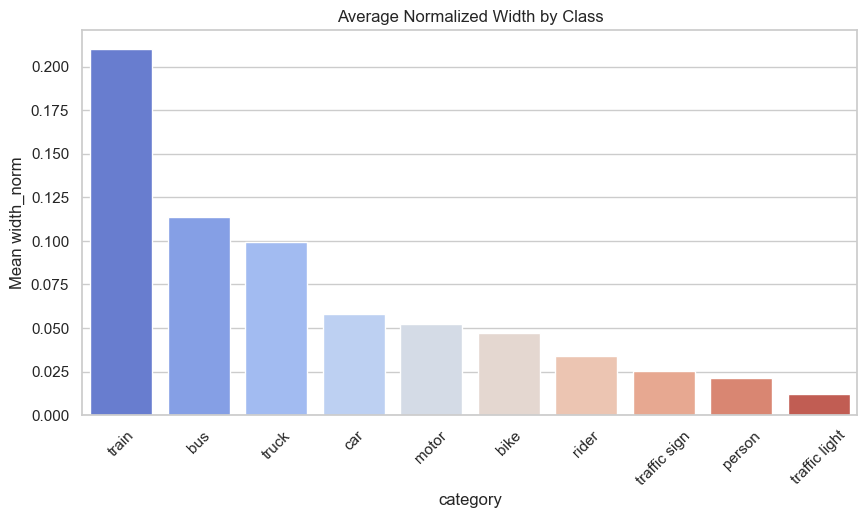

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=class_size_stats.reset_index(),
    x="category",
    y="width_norm",
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.title("Average Normalized Width by Class")
plt.ylabel("Mean width_norm")
plt.show()


C:\Users\niran\AppData\Local\Temp\ipykernel_8612\2079552432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


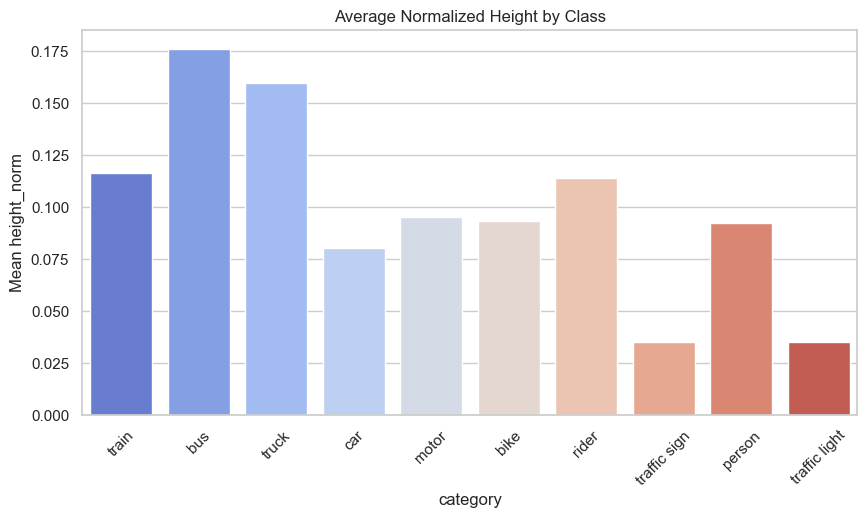

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=class_size_stats.reset_index(),
    x="category",
    y="height_norm",
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.title("Average Normalized Height by Class")
plt.ylabel("Mean height_norm")
plt.show()


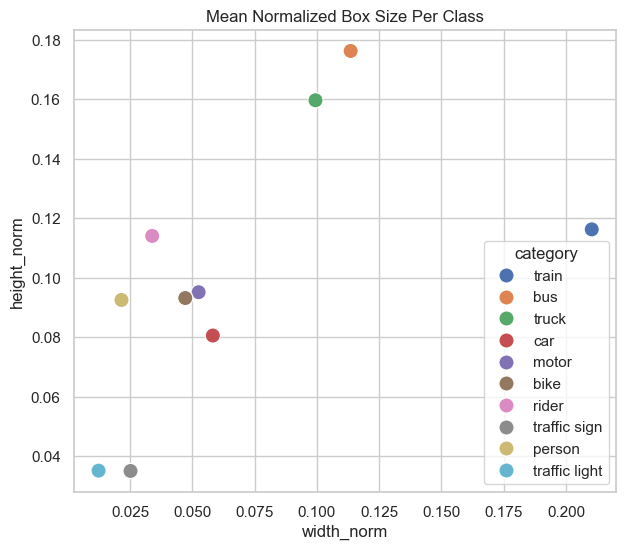

In [13]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=class_size_stats.reset_index(),
    x="width_norm",
    y="height_norm",
    hue="category",
    s=120
)
plt.title("Mean Normalized Box Size Per Class")
plt.xlabel("width_norm")
plt.ylabel("height_norm")
plt.show()
